# EDA on Boston Housing
If you want to type along with me, use [this notebook](https://humboldt.cloudbank.2i2c.cloud/hub/user-redirect/git-pull?repo=https%3A%2F%2Fgithub.com%2Fbethanyj0%2Fdata271_sp24&branch=main&urlpath=tree%2Fdata271_sp24%2Fdemos%2Fdata271_demo21_live.ipynb) instead. 
If you don't want to type and want to follow along just by executing the cells, stay in this notebook. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
sns.set_style("darkgrid")
import warnings 
warnings.filterwarnings('ignore') 

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Useful Seaborn plots for EDA

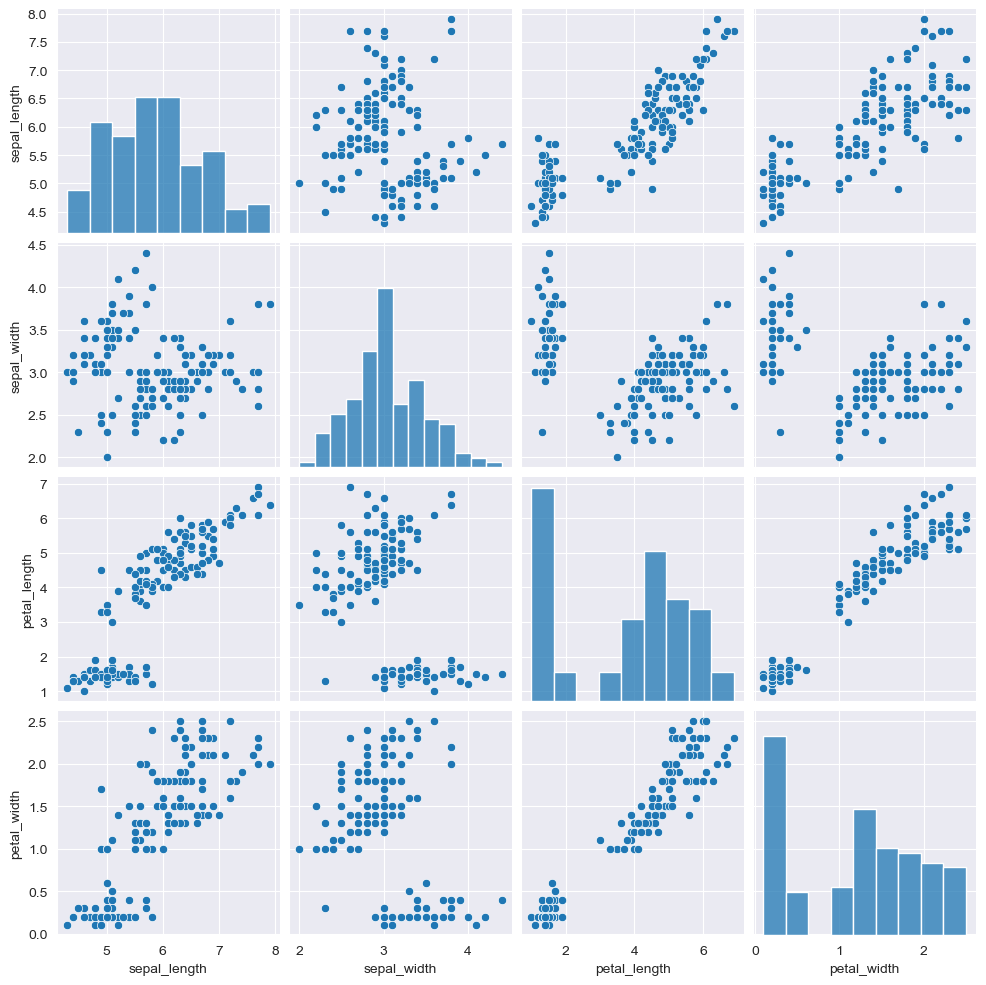

In [3]:
# pairplot
sns.pairplot(iris)
plt.show()

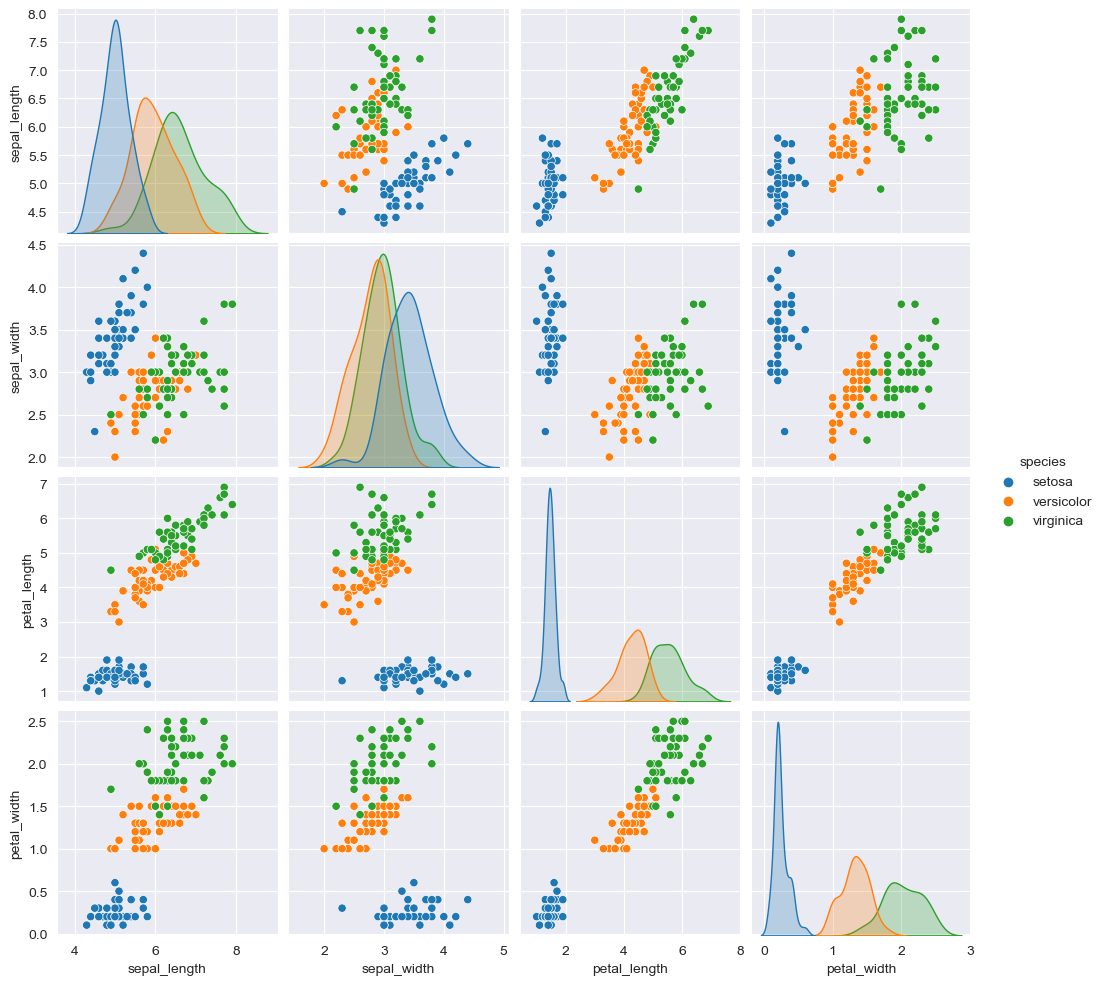

In [4]:
# pairplot customizations
sns.pairplot(data = iris, hue='species')
plt.show()

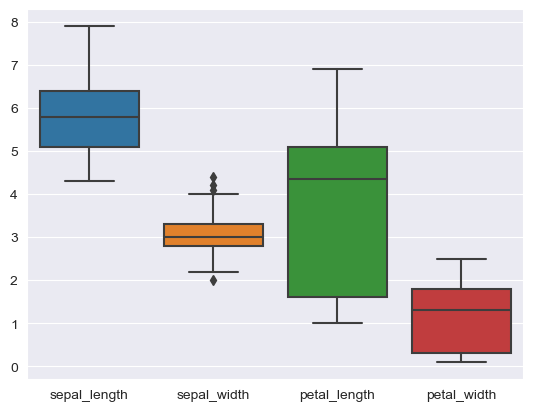

In [5]:
# boxplot
sns.boxplot(data = iris)
plt.show()

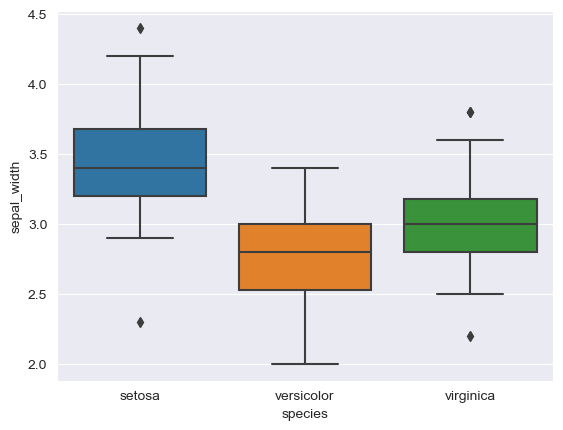

In [6]:
# boxplot for numeric variable vs categorical
sns.boxplot(data = iris, x = 'species',y='sepal_width')
plt.show()

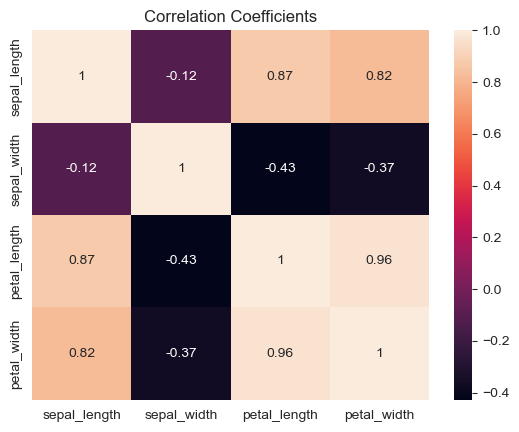

In [7]:
# heatmaps
corrmat = iris.corr(numeric_only=True) # make correlation matrix

sns.heatmap(corrmat, annot = True) 
plt.title('Correlation Coefficients')
plt.show()

# Group Activity: EDA on Housing Data 

### Importing the data

In [8]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22,header = None)
data = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]]))
data.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM","AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT","PRICE"]
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


### Understanding the Features


 - CRIM   -  per capita crime rate by town
 - ZN    -   proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS  -  proportion of non-retail business acres per town
- CHAS  -   Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX  -    nitric oxides concentration (parts per 10 million)
- RM   -    average number of rooms per dwelling
- AGE  -    proportion of owner-occupied units built prior to 1940
- DIS   -   weighted distances to five Boston employment centres
- RAD  -    index of accessibility to radial highways
- TAX  -    full-value property-tax rate per \$10,000
- PTRATIO - pupil-teacher ratio by town
- B    -    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT -   \% lower status of the population
- MEDV   -  Median value of owner-occupied homes in \$1000's

## Discussion question
Looking at the variables and their descriptions above, do any of them stand out, seem strange, or seem potentially problematic?

## EDA - Descriptive statistics

In [9]:
# General data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [10]:
# statistical description of the data
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
# look at mean of each attribute 
data.describe().loc['mean']

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
Name: mean, dtype: float64

## EDA - Data Preparation

In [12]:
# Search for null values
data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
# check for duplicate entries
data.duplicated().sum()

0

## EDA - Visualization

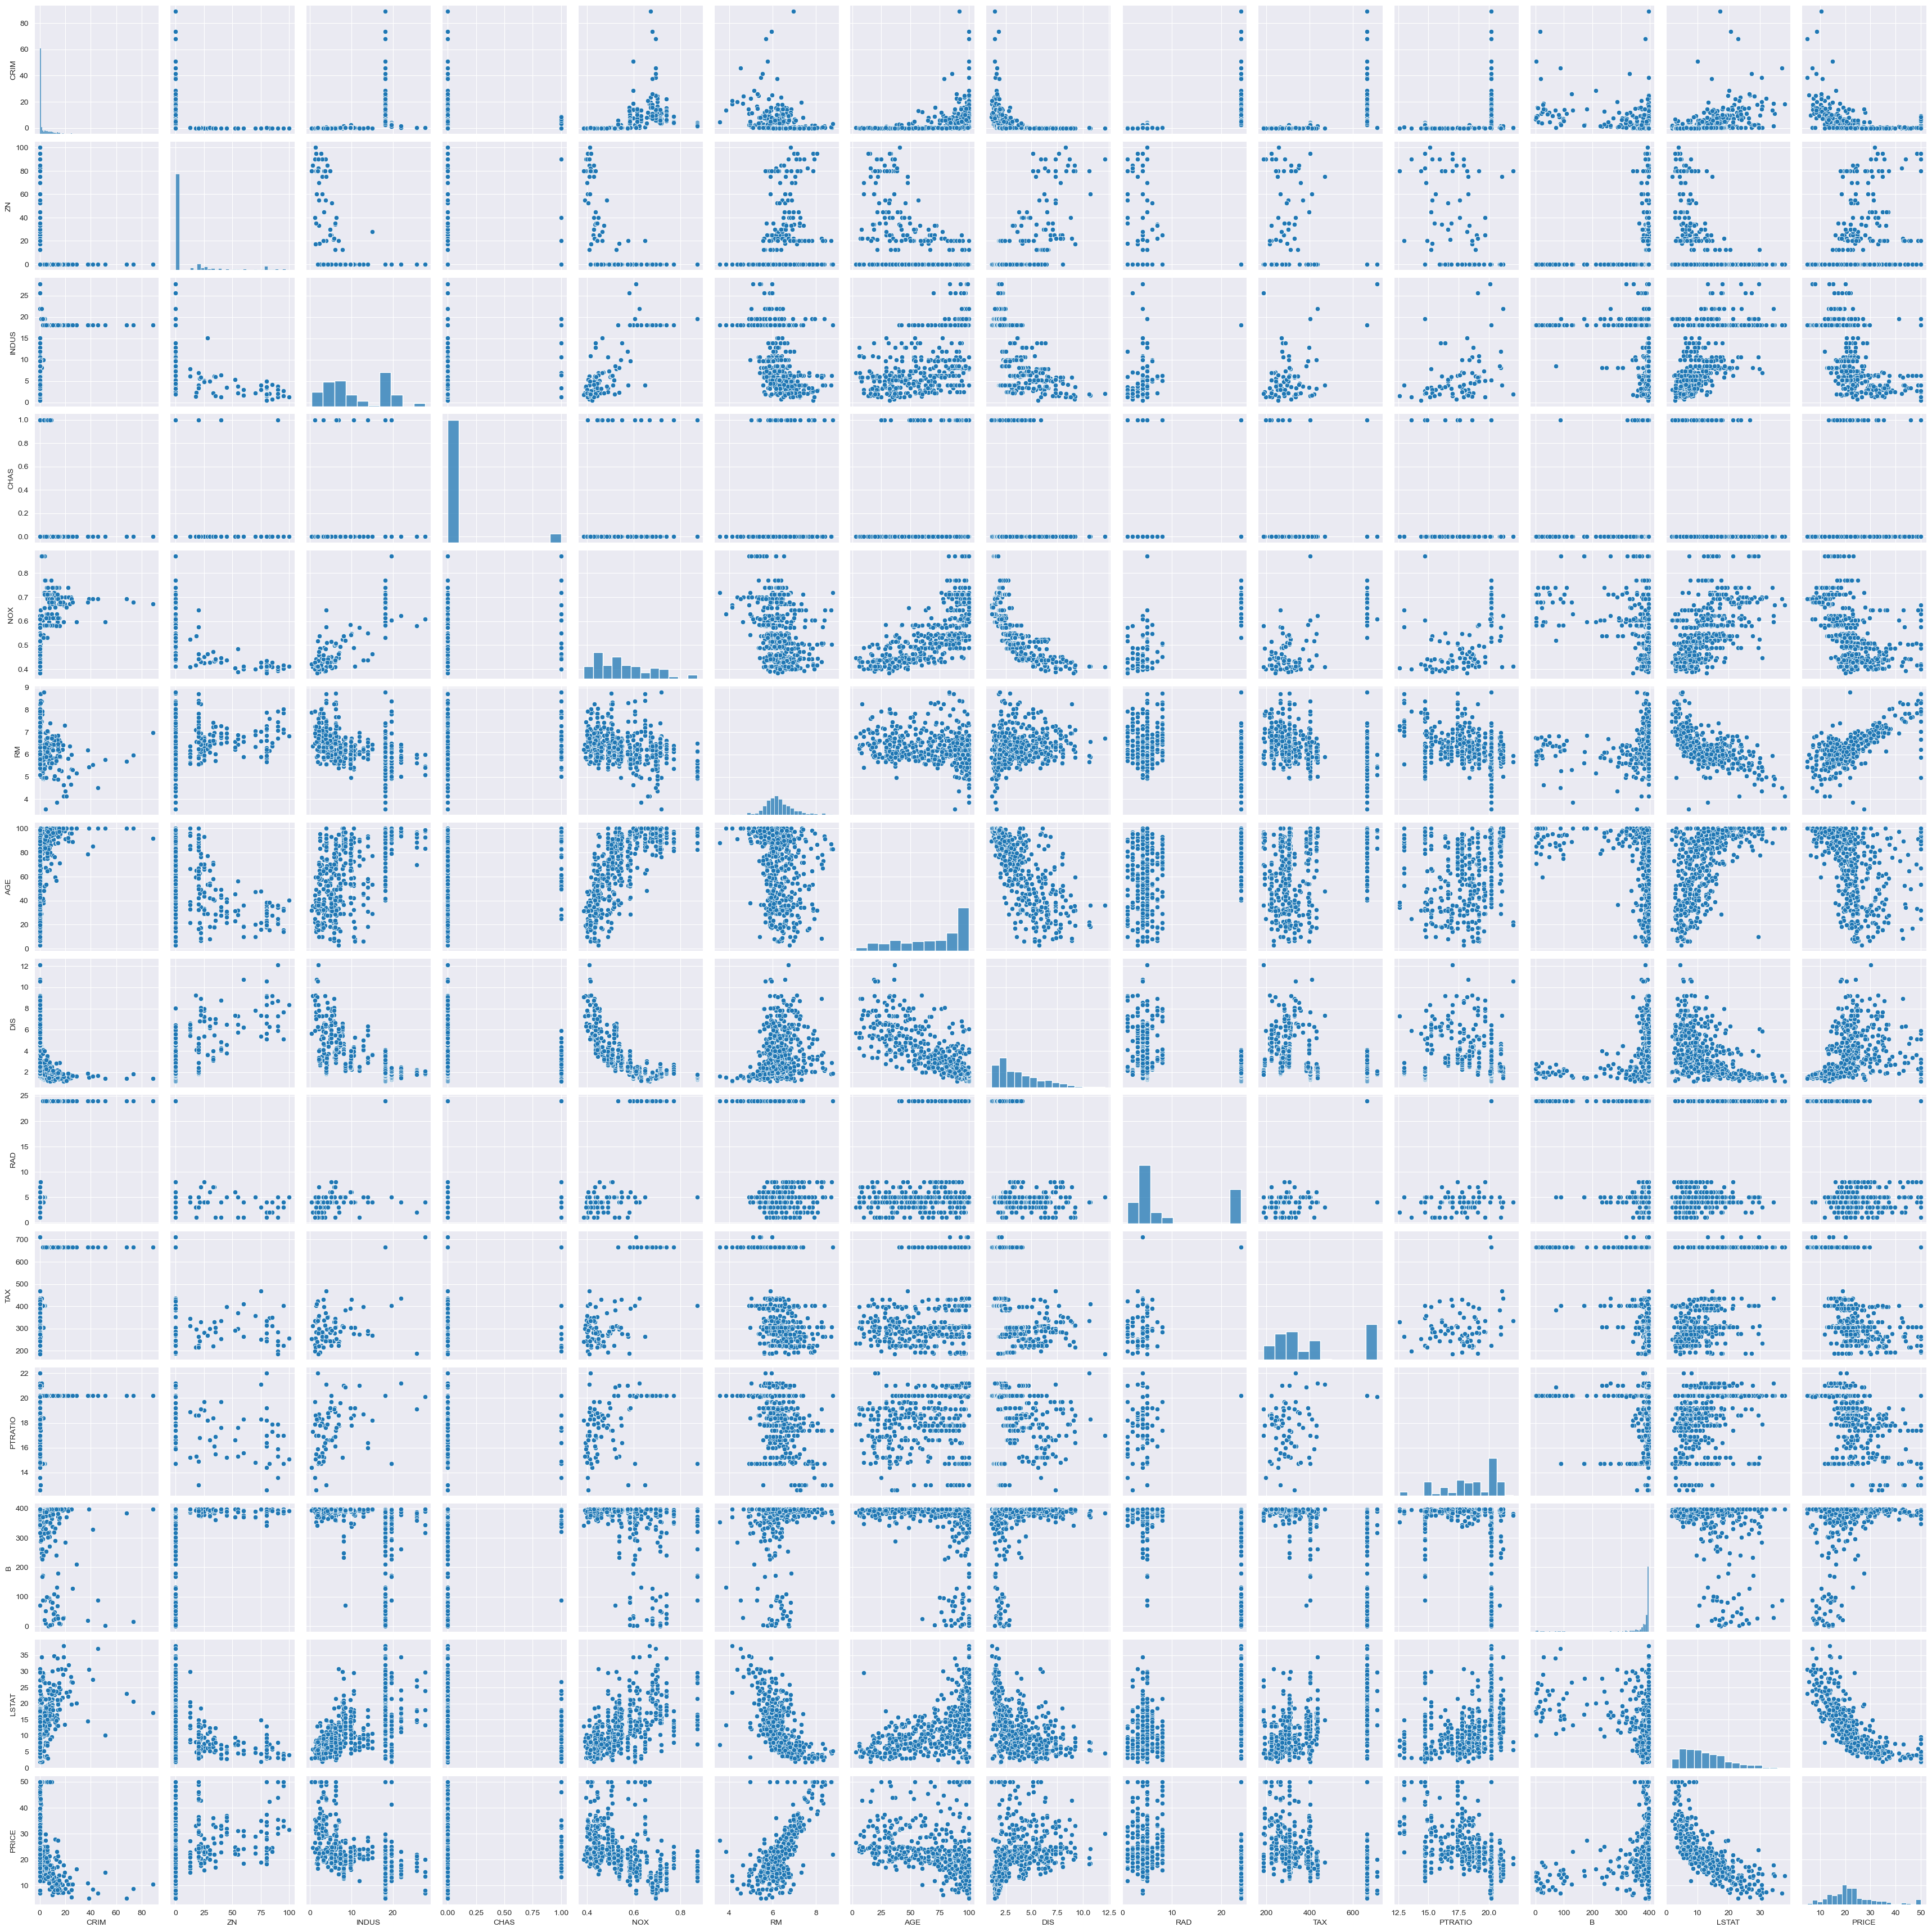

In [14]:
# start with a pairplot
sns.pairplot(data)  

### Reduce number of plots by making scatterplots

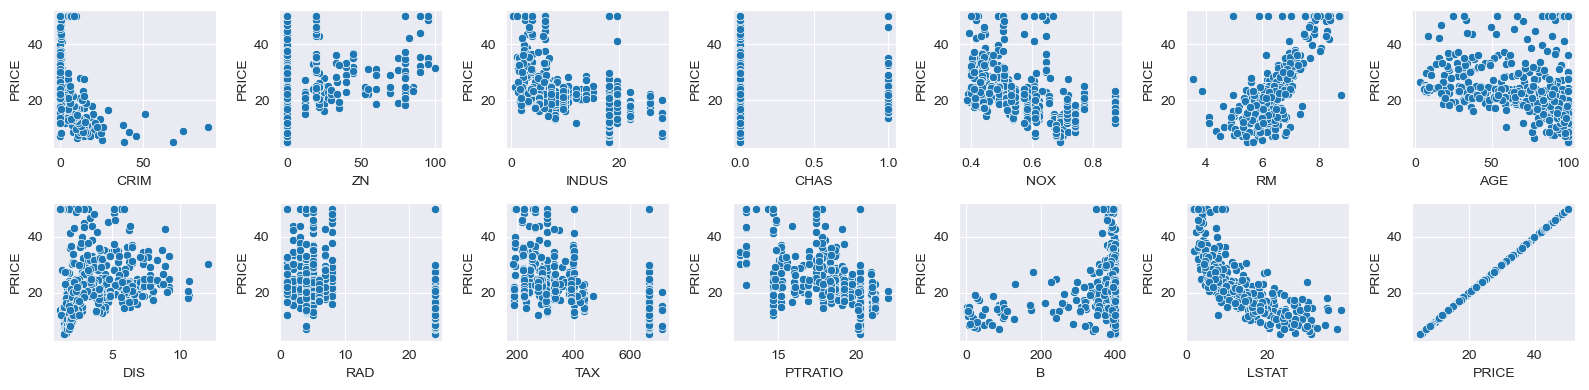

In [15]:
rows = 2
cols = 7
fig, ax = plt.subplots(rows, cols, figsize = (16,4) ) 
index = 0

# plot price as dependent variable (y-axis) against all other variables
for i in range(rows):
    for j in range(cols):
        sns.scatterplot(x = data.columns[index], y = 'PRICE', data = data, ax = ax[i][j]) 
        index = index + 1
        
plt.tight_layout()
plt.show()


### Correlation Coefficients and Heatmaps

In [16]:
# correlation matrix
corrmat = data.corr(numeric_only=True) 
corrmat  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


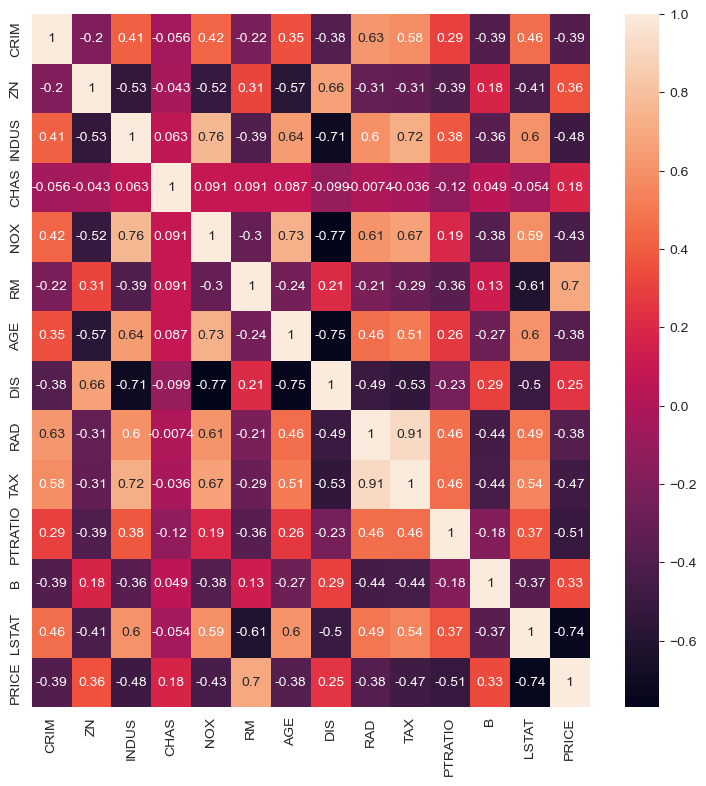

In [17]:
# plot as a heat map to visualize the information in the matrix
plt.figure(figsize = (9, 9)) 
sns.heatmap(corrmat, annot = True) 
plt.show()

### Heatmap and Pair Plot of Correlated Data

In [18]:
# Which variables are highly (>0.5) correlated with price?
abs(corrmat.PRICE) > 0.5

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM          True
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO     True
B          False
LSTAT       True
PRICE       True
Name: PRICE, dtype: bool

In [19]:
corrmat.index[abs(corrmat.PRICE) > 0.5]

Index(['RM', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')

In [20]:
correlated_data = data[corrmat.index[abs(corrmat.PRICE) > 0.5]]
correlated_data.head()

,RM,PTRATIO,LSTAT,PRICE
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


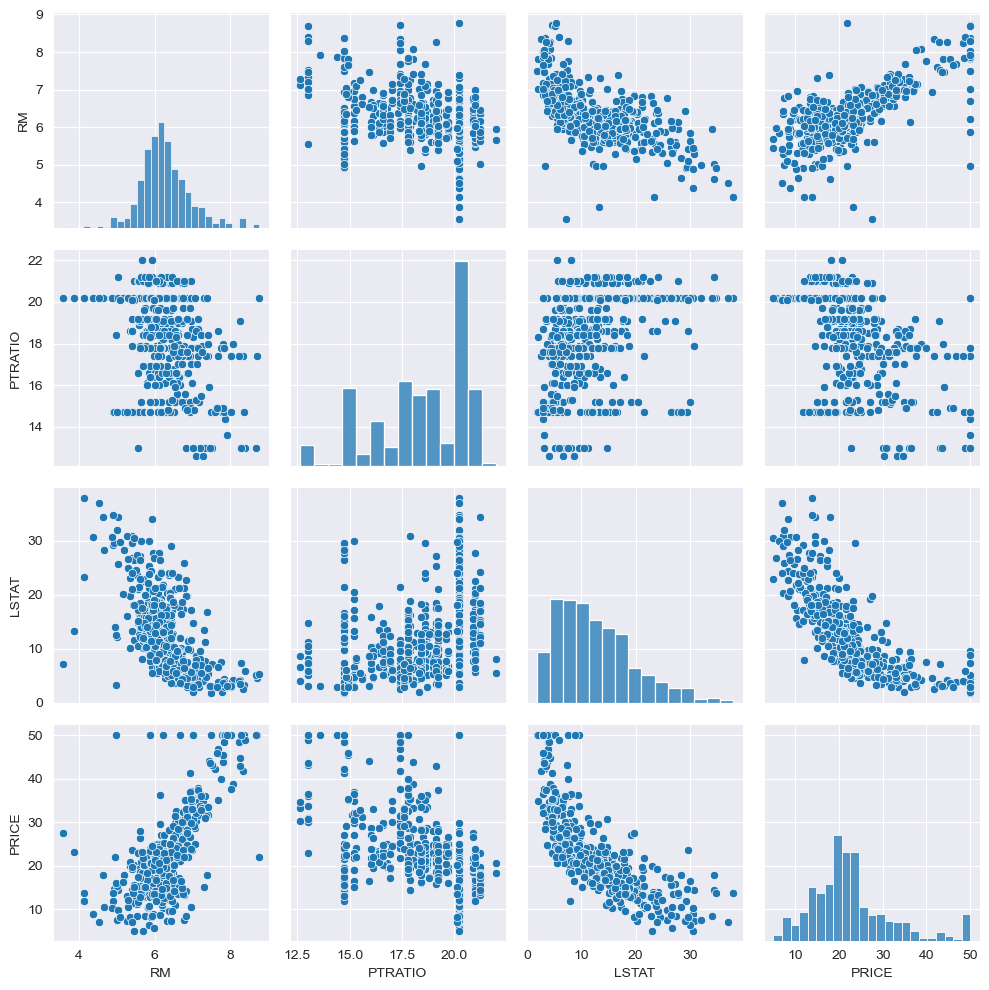

In [21]:
# plot pair plots to display columns which are highly correlated with the price
sns.pairplot(correlated_data)
plt.tight_layout()

### Distributions of variables and boxplots

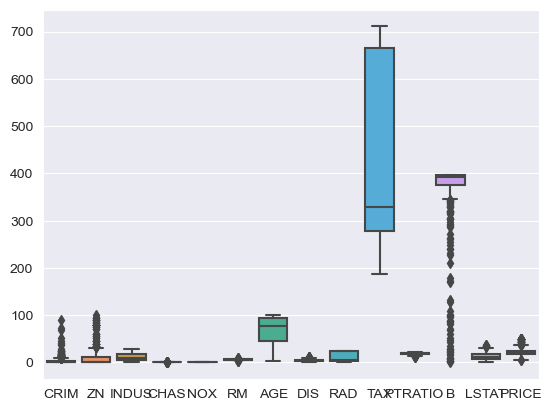

In [22]:
# distributions of data
sns.boxplot(data)
plt.show()

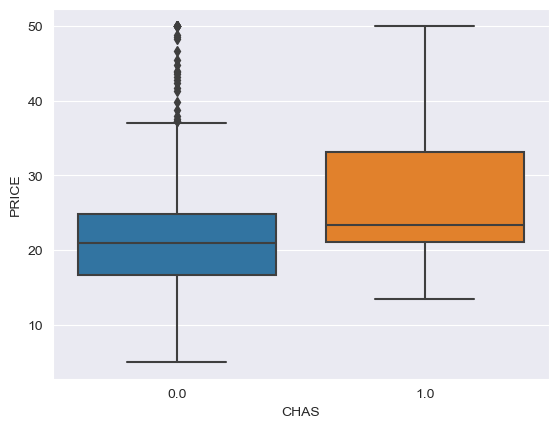

In [23]:
# plot price vs CHAS
sns.boxplot( x = 'CHAS',y = 'PRICE', data = data)
plt.show()

**IMPORTANT NOTE:** The boston housing data set has an ethical problem (actually, several)! It used to be available to import from Python libraries and repositories, and it was often used for benchmarking machine learning models. However, it has been phased out of many libraries due to its ethical issues.  It is an example of how systemic racism can occur in data, and alerts us to the need to be aware of societal biases that can manifest in data sets and resulting analyses.

We will talk about the history of this dataset and problematic ways in which the variables were constructed during class. If you return to the dataset another time, be careful about how you use it and be aware of its issues. 